In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, ifft, fftfreq

In [18]:
Np = 1000
Nf = 7

# signal 1
A_0 = 1.0
f_o = 0.1
phi_0 = 0.0

# signal 2
A_1 = 0.3
f_1 = 0.02
phi_1 = 0.0

# signal 3
A_2 = 0.15
f_2 = 0.005
phi_2 = 0.0

t = np.linspace(0,Np-1,num=Np)

yt = np.zeros((Nf, Np))
yt[0] = A_0*np.sin(2*np.pi*f_o*t+phi_0) + A_1*np.sin(2*np.pi*f_1*t+phi_1)         # fundamentals only
yt[1] = A_0*np.sin(2*np.pi*f_o*t+phi_0) * A_1*np.sin(2*np.pi*f_1*t+phi_1)         # sidebands only
yt[2] = A_0*np.sin(2*np.pi*f_o*t+phi_0) * ( 1 + A_1*np.sin(2*np.pi*f_1*t+phi_1) ) # fundamentals & sidebands
yt[3] = A_1*np.sin(2*np.pi*f_1*t+phi_1) * ( 1 + A_0*np.sin(2*np.pi*f_o*t+phi_0) ) # fundamentals & sidebands
yt[4] = A_0*np.sin(2*np.pi*f_o*t+phi_0 + A_1*np.sin(2*np.pi*f_1*t+phi_1))         # sine in sine
yt[5] = A_0*np.sin(2*np.pi*f_o*t+phi_0) + A_1*np.sin(2*np.pi*f_1*t+phi_1) + A_2*np.sin(2*np.pi*f_2*t+phi_2)      # fundamentals only
yt[6] = A_0*np.sin(2*np.pi*f_o*t+phi_0) * A_1*np.sin(2*np.pi*f_1*t+phi_1) * A_2*np.sin(2*np.pi*f_2*t+phi_2)      # sidebands only


yf, yfa, yfp, yfr, yfi = np.zeros((Nf, Np//2), dtype=complex), np.zeros((Nf, Np//2), dtype=complex), np.zeros((Nf, Np//2), dtype=complex), np.zeros((Nf, Np//2), dtype=complex), np.zeros((Nf, Np//2), dtype=complex)
for i in range(0, Nf):
  yf[i] = fft(yt[i])[:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
  yfa[i] = np.abs(yf[i])           # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
  yfp[i] = np.angle(yf[i])         # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
  yfr[i] = yf[i].real              # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
  yfi[i] = yf[i].imag              # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1

f = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, & remove mirror

Text(0, 0.5, 'sin$\\omega_1$t * sin$\\omega_2$t * sin$\\omega_3$t')

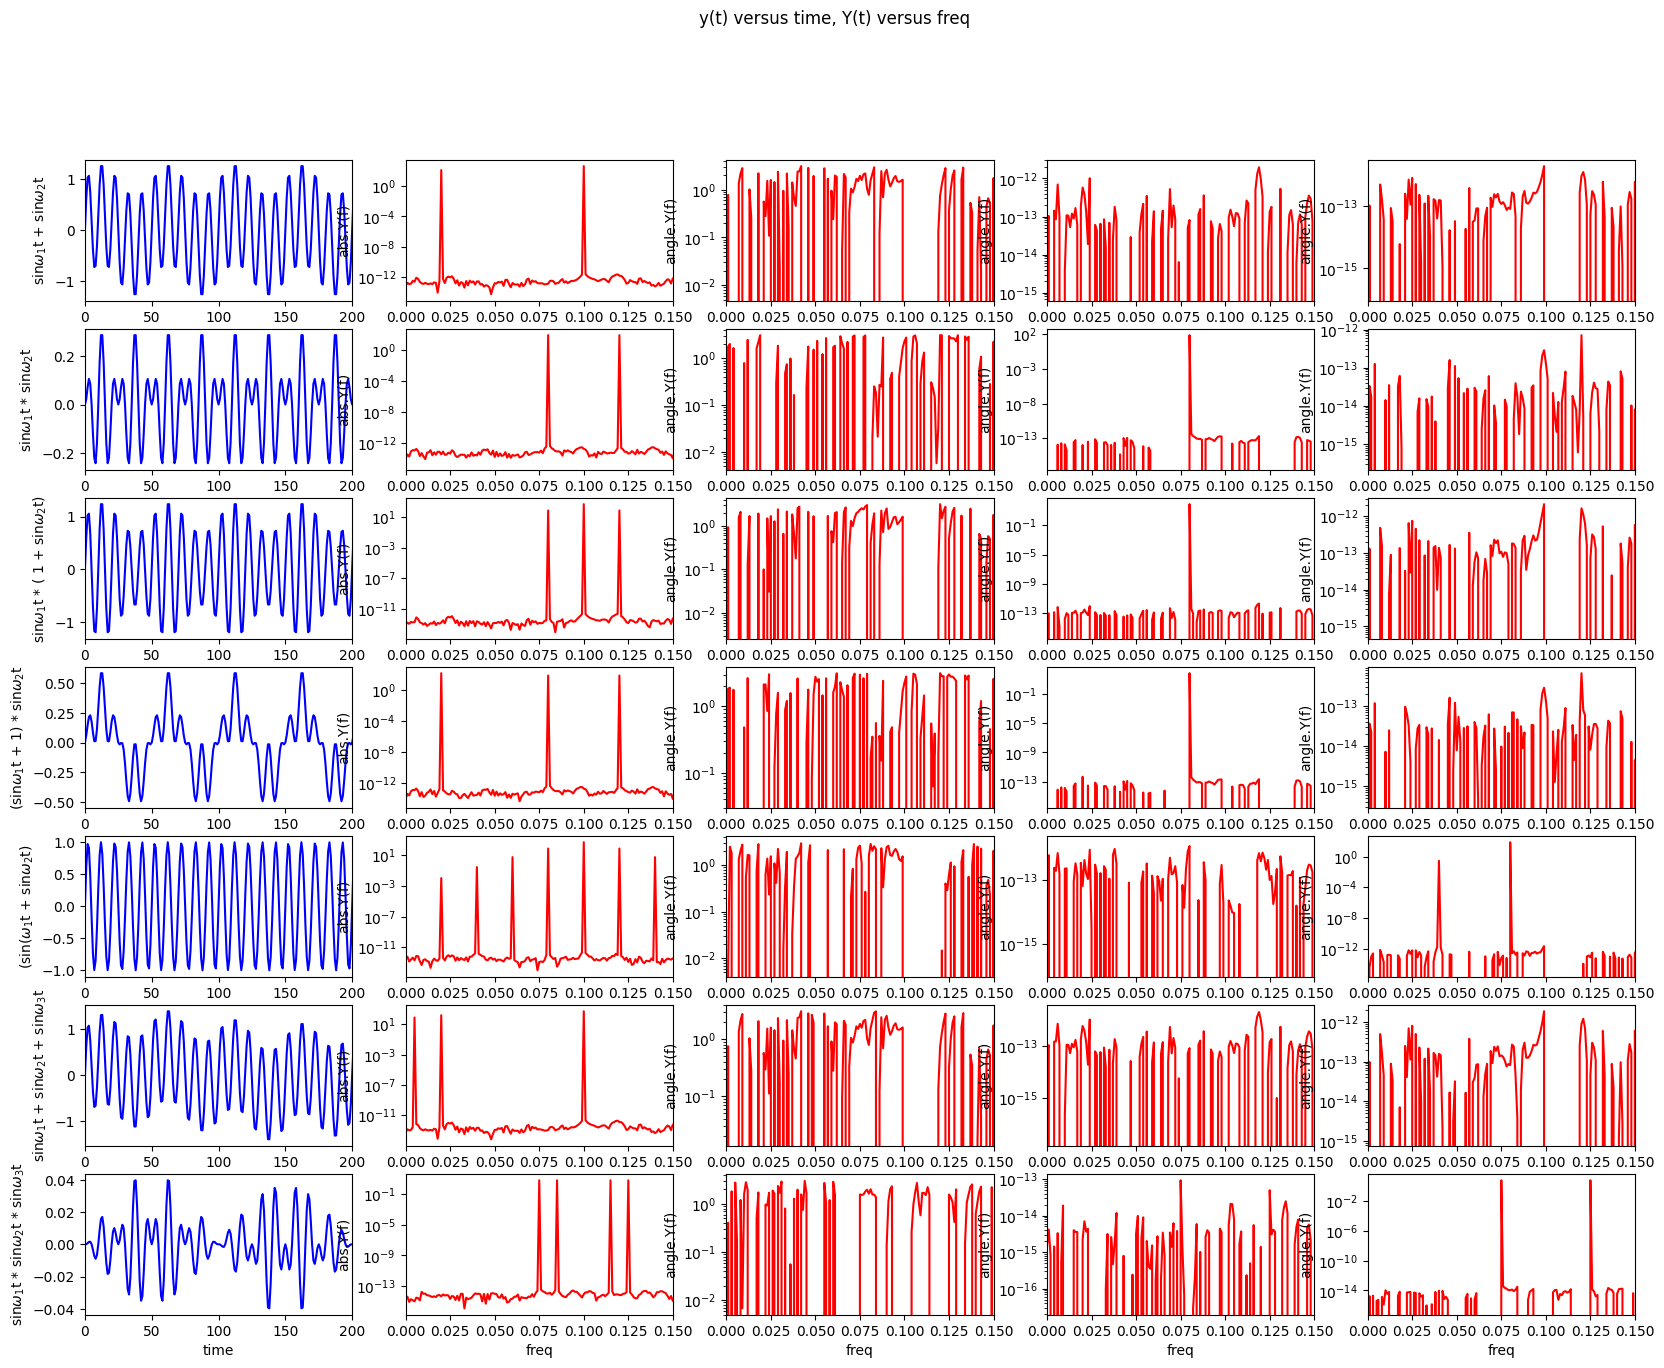

In [19]:
Ng = 5
fig, axes = plt.subplots( Nf, Ng, figsize=(20, 15))
fig.suptitle('y(t) versus time, Y(t) versus freq')

for i in range(0, Nf):
  axes[i][0].plot(t, yt[i], "b")
  axes[i][0].set_xlabel ('time')
  axes[i][0].set_xlim (0.0,200.)
  axes[i][1].plot(f, yfa[i], "r")
  axes[i][1].set_yscale('log')
  axes[i][1].set_xlabel ('freq')
  axes[i][1].set_ylabel ('abs.Y(f)')
  axes[i][1].set_xlim (0.0,0.15)
  axes[i][2].plot(f, yfp[i], "r")
  axes[i][2].set_yscale('log')
  axes[i][2].set_xlabel ('freq')
  axes[i][2].set_ylabel ('angle.Y(f)')
  axes[i][2].set_xlim (0.0,0.15)
  axes[i][3].plot(f, yfr[i], "r")
  axes[i][3].set_yscale('log')
  axes[i][3].set_xlabel ('freq')
  axes[i][3].set_ylabel ('angle.Y(f)')
  axes[i][3].set_xlim (0.0,0.15)
  axes[i][4].plot(f, yfi[i], "r")
  axes[i][4].set_yscale('log')
  axes[i][4].set_xlabel ('freq')
  axes[i][4].set_ylabel ('angle.Y(f)')
  axes[i][4].set_xlim (0.0,0.15)

axes[0][0].set_ylabel ('sin$\omega_1$t + sin$\omega_2$t')
axes[1][0].set_ylabel ('sin$\omega_1$t * sin$\omega_2$t')
axes[2][0].set_ylabel ('sin$\omega_1$t * ( 1 + sin$\omega_2$t)')
axes[3][0].set_ylabel ('(sin$\omega_1$t + 1) * sin$\omega_2$t')
axes[4][0].set_ylabel ('(sin($\omega_1$t + sin$\omega_2$t)')
axes[5][0].set_ylabel ('sin$\omega_1$t + sin$\omega_2$t + sin$\omega_3$t')
axes[6][0].set_ylabel ('sin$\omega_1$t * sin$\omega_2$t * sin$\omega_3$t')

NameError: name 'y1' is not defined

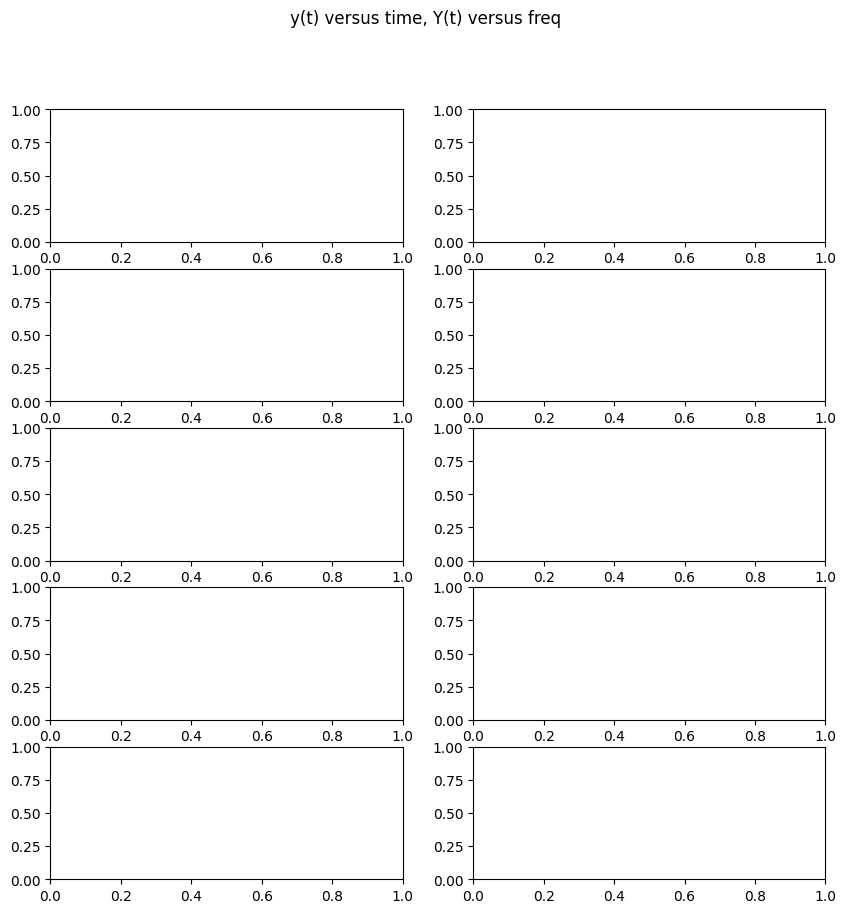

In [4]:
fig, axes = plt.subplots( 5, 2, figsize=(10, 10))
fig.suptitle('y(t) versus time, Y(t) versus freq')

axes[0][0].plot(t, y1, "b")
axes[0][0].set_xlabel ('time, n ')
axes[0][0].set_ylabel ('y_n')
axes[0][0].set_xlim (0.0,200.)
axes[0][1].plot(f, np.abs(Y1), "r")
axes[0][1].set_xlabel ('freq, k')
axes[0][1].set_ylabel ('abs(Y_k)')
axes[0][1].set_xlim (0.0,0.25)

axes[1][0].plot(t, y2, "b")
axes[1][0].set_xlabel ('time, n ')
axes[1][0].set_ylabel ('y_n')
axes[1][0].set_xlim (0.0,200.)
axes[1][1].plot(f, np.abs(Y2), "r")
axes[1][1].set_xlabel ('freq, k')
axes[1][1].set_ylabel ('abs(Y_k)')
axes[1][1].set_xlim (0.0,0.25)

axes[2][0].plot(t, y3, "b")
axes[2][0].set_xlabel ('time, n ')
axes[2][0].set_ylabel ('y_n')
axes[2][0].set_xlim (0.0,200.)
axes[2][1].plot(f, np.abs(Y3), "r")
axes[2][1].set_xlabel ('freq, k')
axes[2][1].set_ylabel ('abs(Y_k)')
axes[2][1].set_xlim (0.0,0.25)

axes[3][0].plot(t, y4, "b")
axes[3][0].set_xlabel ('time, n ')
axes[3][0].set_ylabel ('y_n')
axes[3][0].set_xlim (0.0,200.)
axes[3][1].plot(f, np.abs(Y4), "r")
axes[3][1].set_xlabel ('freq, k')
axes[3][1].set_ylabel ('abs(Y_k)')
axes[3][1].set_xlim (0.0,0.25)

axes[4][0].plot(t, y5, "b")
axes[4][0].set_xlabel ('time, n ')
axes[4][0].set_ylabel ('y_n')
axes[4][0].set_xlim (0.0,200.)
axes[4][1].plot(f, np.abs(Y5), "r")
axes[4][1].set_xlabel ('freq, k')
axes[4][1].set_ylabel ('abs(Y_k)')
axes[4][1].set_xlim (0.0,0.25)

In [ ]:
fig, axes = plt.subplots( 5, 2, figsize=(10, 10))
fig.suptitle('y(t) versus time, Y(t) versus freq')

axes[0][0].plot(t, y1, "b")
axes[0][0].set_xlabel ('time, n ')
axes[0][0].set_ylabel ('y_n')
axes[0][0].set_xlim (0.0,200.)
axes[0][1].plot(f, Y1r, "r")
axes[0][1].set_xlabel ('freq, k')
axes[0][1].set_ylabel ('Re(Y_k)')
axes[0][1].set_xlim (0.0,0.25)

axes[1][0].plot(t, y2, "b")
axes[1][0].set_xlabel ('time, n ')
axes[1][0].set_ylabel ('y_n')
axes[1][0].set_xlim (0.0,200.)
axes[1][1].plot(f, Y2r, "r")
axes[1][1].set_xlabel ('freq, k')
axes[1][1].set_ylabel ('Re(Y_k)')
axes[1][1].set_xlim (0.0,0.25)

axes[2][0].plot(t, y3, "b")
axes[2][0].set_xlabel ('time, n ')
axes[2][0].set_ylabel ('y_n')
axes[2][0].set_xlim (0.0,200.)
axes[2][1].plot(f, Y3r, "r")
axes[2][1].set_xlabel ('freq, k')
axes[2][1].set_ylabel ('Re(Y_k)')
axes[2][1].set_xlim (0.0,0.25)

axes[3][0].plot(t, y4, "b")
axes[3][0].set_xlabel ('time, n ')
axes[3][0].set_ylabel ('y_n')
axes[3][0].set_xlim (0.0,200.)
axes[3][1].plot(f, Y4r, "r")
axes[3][1].set_xlabel ('freq, k')
axes[3][1].set_ylabel ('Re(Y_k)')
axes[3][1].set_xlim (0.0,0.25)

axes[4][0].plot(t, y5, "b")
axes[4][0].set_xlabel ('time, n ')
axes[4][0].set_ylabel ('y_n')
axes[4][0].set_xlim (0.0,200.)
axes[4][1].plot(f, Y5r, "r")
axes[4][1].set_xlabel ('freq, k')
axes[4][1].set_ylabel ('Re(Y_k)')
axes[4][1].set_xlim (0.0,0.25)

In [ ]:
fig, axes = plt.subplots( 5, 2, figsize=(10, 10))
fig.suptitle('y(t) versus time, Y(t) versus freq')

axes[0][0].plot(t, y1, "b")
axes[0][0].set_xlabel ('time, n ')
axes[0][0].set_ylabel ('y_n')
axes[0][0].set_xlim (0.0,200.)
axes[0][1].plot(f, Y1i, "r")
axes[0][1].set_xlabel ('freq, k')
axes[0][1].set_ylabel ('Im(Y_k)')
axes[0][1].set_xlim (0.0,0.25)

axes[1][0].plot(t, y2, "b")
axes[1][0].set_xlabel ('time, n ')
axes[1][0].set_ylabel ('y_n')
axes[1][0].set_xlim (0.0,200.)
axes[1][1].plot(f, Y2i, "r")
axes[1][1].set_xlabel ('freq, k')
axes[1][1].set_ylabel ('Im(Y_k)')
axes[1][1].set_xlim (0.0,0.25)

axes[2][0].plot(t, y3, "b")
axes[2][0].set_xlabel ('time, n ')
axes[2][0].set_ylabel ('y_n')
axes[2][0].set_xlim (0.0,200.)
axes[2][1].plot(f, Y3i, "r")
axes[2][1].set_xlabel ('freq, k')
axes[2][1].set_ylabel ('Im(Y_k)')
axes[2][1].set_xlim (0.0,0.25)

axes[3][0].plot(t, y4, "b")
axes[3][0].set_xlabel ('time, n ')
axes[3][0].set_ylabel ('y_n')
axes[3][0].set_xlim (0.0,200.)
axes[3][1].plot(f, Y4i, "r")
axes[3][1].set_xlabel ('freq, k')
axes[3][1].set_ylabel ('Im(Y_k)')
axes[3][1].set_xlim (0.0,0.25)

axes[4][0].plot(t, y5, "b")
axes[4][0].set_xlabel ('time, n ')
axes[4][0].set_ylabel ('y_n')
axes[4][0].set_xlim (0.0,200.)
axes[4][1].plot(f, Y5i, "r")
axes[4][1].set_xlabel ('freq, k')
axes[4][1].set_ylabel ('Im(Y_k)')
axes[4][1].set_xlim (0.0,0.25)

In [ ]:
%timeit fft(y)

In [ ]:
%timeit dft(y)

In [ ]:
y = misc.electrocardiogram()
plt.plot(y)
Np = len(y)

f = fft(y)[0:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
yf = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, &  remove mirror%
plt.plot(yf,abs(f))
plt.ylim(0,1)

In [ ]:
#y = np.cos(2*np.pi*f_o*t)
#y = signal.sawtooth(2*np.pi*f_o*t)
#y = signal.square(2*np.pi*f_o*t)
#y = signal.unit_impulse( Np, 250)